# Encoder-Decoder Architecture

The encoder-decoder architecture is a neural network design pattern. In this architecture, the network is
partitioned into two parts, the encoder and the decoder. The encoder’s role is encoding the inputs into state,
which often contains several tensors. Then the state is passed into the decoder to generate the outputs. In
machine translation, the encoder transforms a source sentence, e.g. “Hello world.”, into state, e.g. a vector,
that captures its semantic information. The decoder then uses this state to generate the translated target
sentence, e.g. “Bonjour le monde.”.

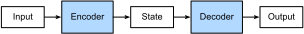

In [1]:
from IPython.display import SVG
SVG('img/encoder-decoder.svg')

In this section, we will show an interface to implement this encoder-decoder architecture.

In [2]:
import torch
import torch.nn as nn

## Encoder

The encoder is a normal neural network that takes inputs, e.g. a source sentence, to return outputs.

In [3]:
class Encoder(nn.Module):
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

## Decoder

The decoder has an additional method init_state to parse the outputs of the encoder with possible ad-
ditional information, e.g. the valid lengths of inputs, to return the state it needs. In the forward method,
the decoder takes both inputs, e.g. a target sentence, and the state. It returns outputs, with potentially
modified state if the encoder contains RNN layers.

In [4]:
class Decoder(nn.Module):
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

## Model 

The encoder-decoder model contains both an encoder an decoder. We implement its forward method for
training. It takes both encoder inputs and decoder inputs, with optional additional information. During
computation, it first compute encoder outputs to initialize the decoder state, and then returns the decoder
outputs.

In [5]:
class EncoderDecoder(nn.Module):
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)